In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
from PIL import Image 
import pytesseract 

im = Image.open("testImg.jpg") 
# im = Image.open("img.png")
image = np.asarray(im, dtype=np.uint8)
# text = pytesseract.image_to_string(im, lang = 'kor') 

# print(text)

In [37]:
gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
img_bin=~img_bin

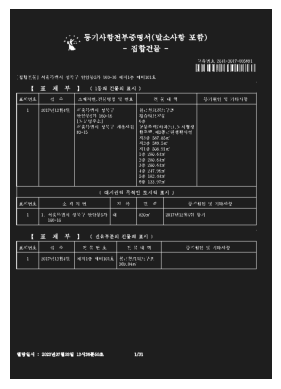

In [39]:
imgRGB = cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(imgRGB) 
plt.show()

In [40]:
### selecting min size as 15 pixels
line_min_width = 15
kernal_h = np.ones((1,line_min_width), np.uint8)
kernal_v = np.ones((line_min_width,1), np.uint8)

In [41]:
# Horizontal Kernel, Vertical Kernel
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)

# MIX Kernel
img_bin_final=img_bin_h|img_bin_v

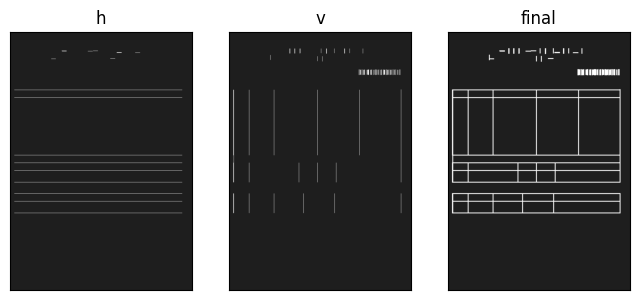

: 

In [54]:
imgRGB = cv2.cvtColor(img_bin_h, cv2.COLOR_BGR2RGB)
imgRGB2 = cv2.cvtColor(img_bin_v, cv2.COLOR_BGR2RGB)
imgRGB3 = cv2.cvtColor(img_bin_final, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,5))
plt.subplot(1, 3, 1), plt.imshow(imgRGB)
plt.title('h')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2), plt.imshow(imgRGB2)
plt.title('v')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3), plt.imshow(imgRGB3)
plt.title('final')
plt.xticks([]), plt.yticks([])

plt.show()

In [42]:
final_kernel = np.ones((3,3), np.uint8)
img_bin_final=cv2.dilate(img_bin_final, final_kernel, iterations=1)

In [43]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

n1 = np.array(stats[2:])

In [9]:
for x,y,w,h,area in stats[2:]:
        # print(f"x: {x}, y: {y}, w: {w}, h: {h}, pixel: {area}, x+w: {x+w}, y+h: {y+h}")
        cv2.rectangle(image,(x,y), (x+w, y+h),(0,255,0), 2)

In [10]:
xw = n1[:, [0,2]].sum(axis=1).max()
yh = n1[:, [1,3]].sum(axis=1).max()
    
cv2.rectangle(image,(min_x, min_y),(xw, yh),(0,0,255), 2)

ValueError: zero-size array to reduction operation maximum which has no identity

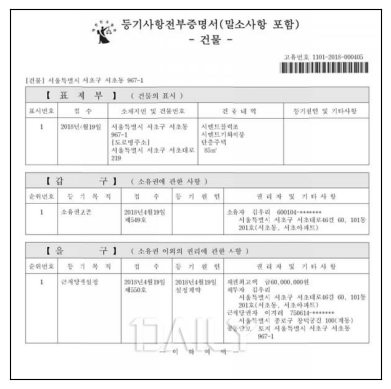

In [6]:
plt.imshow(image)
plt.xticks([]), plt.yticks([])
plt.show()